# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape


(1599, 12)

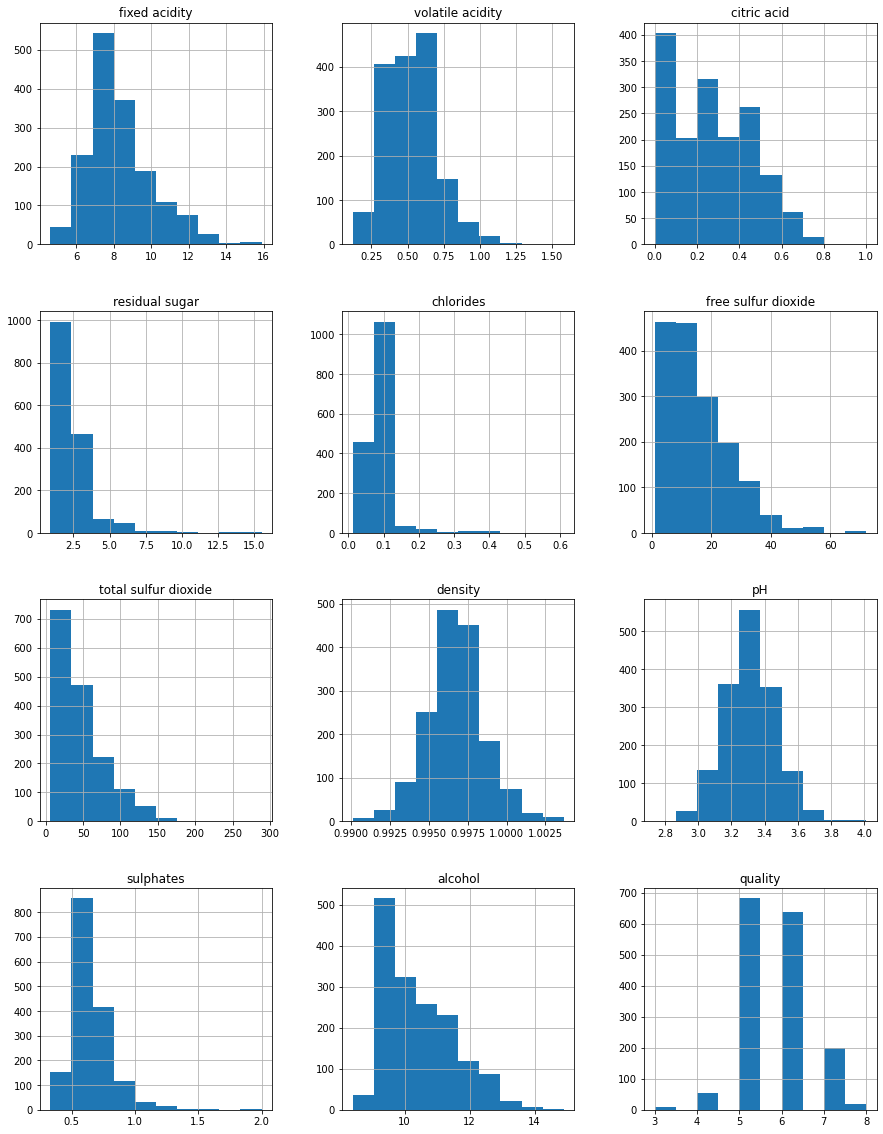

In [7]:
#EDA - Correlation (to drop columns with high correlation)
df.hist(bins=10, figsize=(15, 20))
plt.show()


<AxesSubplot:>

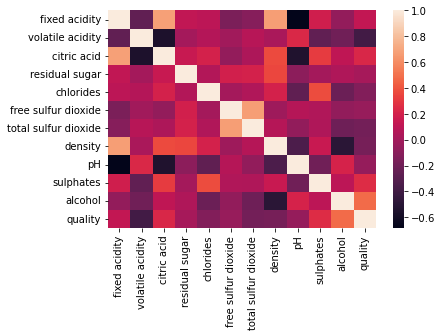

In [8]:
#EDA - Correlation
import seaborn as sns
sns.heatmap(df.corr())

In [9]:
# Create the features (X) and target (y) sets
# iloc [rows, columns]
X = df.iloc[:, 0:11].values
y = df["quality"].values


In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)




## Define a model with 1 hidden layer

In [13]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = X.shape[1]

# Hidden layer
model = Sequential()    
model.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_input_features))
# Output layer
model.add(Dense(units=1, activation="linear"))



Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-09-07 20:11:24.244426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-07 20:11:24.244556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])

# Train the model
model_1 = model.fit(X, y, validation_split= 0.3, epochs=200)


Epoch 1/200


2022-09-07 20:13:18.866561: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/35 [=======>......................] - ETA: 0s - loss: 29.0049 - mse: 29.0049 

2022-09-07 20:13:19.145093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 9ms/step - loss: 30.6627 - mse: 30.6627 - val_loss: 35.8717 - val_mse: 35.8717
Epoch 2/200
22/35 [=================>............] - ETA: 0s - loss: 27.9598 - mse: 27.9598

2022-09-07 20:13:19.531483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 6ms/step - loss: 26.9403 - mse: 26.9403 - val_loss: 32.4329 - val_mse: 32.4329
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 23.5926 - mse: 23.5926 - val_loss: 29.4072 - val_mse: 29.4072
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 20.6257 - mse: 20.6257 - val_loss: 26.5215 - val_mse: 26.5215
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 17.9619 - mse: 17.9619 - val_loss: 23.8264 - val_mse: 23.8264
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 15.5884 - mse: 15.5884 - val_loss: 21.3650 - val_mse: 21.3650
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 13.4820 - mse: 13.4820 - val_loss: 18.9942 - val_mse: 18.9942
Epoch 8/200
35/35 [==============================] - 0s 6ms/step - loss: 11.6485 - mse: 11.6485 - val_loss: 16.7182 - val_mse: 16.7182
Epoch 9/200
35/35 [==============================] - 0s 6ms/step - 

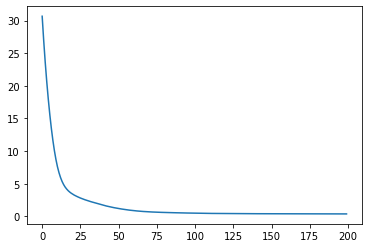

In [15]:
# what is MSE?
# Plot the train and test loss function
plt.plot(model_1.history["loss"])


## Define a model with 2 hidden layers

In [16]:
# Define the model - deep neural net
number_hidden_nodes = 11
number_nodes_layer1 = 8
number_nodes_layer2 = 4



# First hidden layer
model = Sequential()
model.add(Dense(units=number_nodes_layer1, activation="relu", input_dim=number_input_features))


# Second hidden layer
model.add(Dense(units=number_nodes_layer2, activation="relu"))


# Output layer
model.add(Dense(units=1, activation="linear"))



In [17]:
# Compile model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
# Fit the model
model_2 = model.fit(X, y, validation_split= 0.3, epochs=200)


Epoch 1/200
20/35 [================>.............] - ETA: 0s - loss: 32.9339 - mse: 32.9339

2022-09-07 20:16:29.694582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 10ms/step - loss: 32.2662 - mse: 32.2662 - val_loss: 30.6445 - val_mse: 30.6445
Epoch 2/200
19/35 [===============>..............] - ETA: 0s - loss: 28.8033 - mse: 28.8033

2022-09-07 20:16:30.053119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 7ms/step - loss: 28.1107 - mse: 28.1107 - val_loss: 25.5834 - val_mse: 25.5834
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 23.5802 - mse: 23.5802 - val_loss: 20.8202 - val_mse: 20.8202
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 18.6974 - mse: 18.6974 - val_loss: 16.3982 - val_mse: 16.3982
Epoch 5/200
35/35 [==============================] - 0s 7ms/step - loss: 14.0699 - mse: 14.0699 - val_loss: 12.4451 - val_mse: 12.4451
Epoch 6/200
35/35 [==============================] - 0s 7ms/step - loss: 10.1096 - mse: 10.1096 - val_loss: 9.1144 - val_mse: 9.1144
Epoch 7/200
35/35 [==============================] - 0s 7ms/step - loss: 7.2221 - mse: 7.2221 - val_loss: 6.8422 - val_mse: 6.8422
Epoch 8/200
35/35 [==============================] - 0s 7ms/step - loss: 5.4561 - mse: 5.4561 - val_loss: 5.3658 - val_mse: 5.3658
Epoch 9/200
35/35 [==============================] - 0s 7ms/step - loss: 4.51

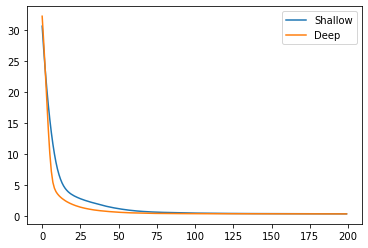

In [20]:
# Overlay results of deep and shallow models

plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.legend(["Shallow", "Deep"])
plt.show()


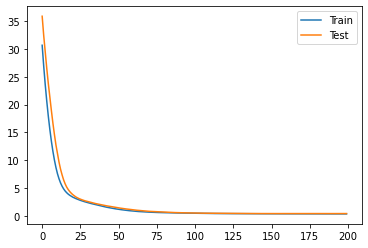

In [21]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.legend(["Train", "Test"])
plt.show()


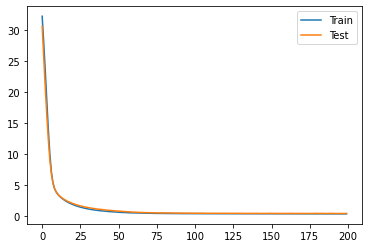

In [22]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.legend(["Train", "Test"])
plt.show()

